In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
df=pd.read_csv('/content/dataset.csv')
df.head()

,text,author
0,কারওয়ান বাজার এলাকার মাদক ব্যবসা নিয়ন্ত্রণ ক...,Humayun Ahmed
1,গুলশান এলাকার একটা ফ্যাট সে ভাড়া করে। এই ফ্ল্...,Humayun Ahmed
2,আমাকে শোভা ডাকতে পারে না। আমাকে ডাকে– শো শো শো...,Humayun Ahmed
3,রান্না ভালো হয় নি। শোভা আপুর রান্নার হাত জঘন্...,Humayun Ahmed
4,অবশ্যই । দুপুরে তুমি খাবে। ছোট্ট একটা কাজ করতে...,Humayun Ahmed


In [4]:
import re
df['prep']=df.text.apply(lambda x: [i for i in re.sub(r'[^\u0980-\u09E3 A-Za-z]+', ' ', str(x)).split() if len(i) > 1])
df['clean_text']=df['prep'].apply(lambda x: " ".join(x))

In [5]:
df.head()

,text,author,prep,clean_text
0,কারওয়ান বাজার এলাকার মাদক ব্যবসা নিয়ন্ত্রণ ক...,Humayun Ahmed,"[কারওয়ান, বাজার, এলাকার, মাদক, ব্যবসা, নিয়ন্...",কারওয়ান বাজার এলাকার মাদক ব্যবসা নিয়ন্ত্রণ ক...
1,গুলশান এলাকার একটা ফ্যাট সে ভাড়া করে। এই ফ্ল্...,Humayun Ahmed,"[গুলশান, এলাকার, একটা, ফ্যাট, সে, ভাড়া, করে, ...",গুলশান এলাকার একটা ফ্যাট সে ভাড়া করে এই ফ্ল্য...
2,আমাকে শোভা ডাকতে পারে না। আমাকে ডাকে– শো শো শো...,Humayun Ahmed,"[আমাকে, শোভা, ডাকতে, পারে, না, আমাকে, ডাকে, শো...",আমাকে শোভা ডাকতে পারে না আমাকে ডাকে শো শো শো আ...
3,রান্না ভালো হয় নি। শোভা আপুর রান্নার হাত জঘন্...,Humayun Ahmed,"[রান্না, ভালো, হয়, নি, শোভা, আপুর, রান্নার, হ...",রান্না ভালো হয় নি শোভা আপুর রান্নার হাত জঘন্য...
4,অবশ্যই । দুপুরে তুমি খাবে। ছোট্ট একটা কাজ করতে...,Humayun Ahmed,"[অবশ্যই, দুপুরে, তুমি, খাবে, ছোট্ট, একটা, কাজ,...",অবশ্যই দুপুরে তুমি খাবে ছোট্ট একটা কাজ করতে পা...


In [6]:
X=df.clean_text.to_list()
y=df.author.to_list()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=50,stratify=y)

In [8]:
!pip install ktrain

In [9]:
import ktrain
from ktrain import text

In [10]:
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=200)

In [11]:

trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 143
	95percentile : 211
	99percentile : 256


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 141
	95percentile : 205
	99percentile : 228


In [12]:
model = t.get_classifier()

In [13]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val,batch_size=6)

In [14]:
#learner.lr_find(show_plot=True, max_epochs=1)

In [15]:
learner.fit_onecycle(9e-5, 6)



begin training using onecycle policy with max lr of 9e-05...
Epoch 1/6
210/210 [==============================] - 154s 624ms/step - loss: 1.9433 - accuracy: 0.4325 - val_loss: 0.8438 - val_accuracy: 0.8143
Epoch 2/6
210/210 [==============================] - 128s 608ms/step - loss: 0.6093 - accuracy: 0.8389 - val_loss: 0.3855 - val_accuracy: 0.8857
Epoch 3/6
210/210 [==============================] - 128s 608ms/step - loss: 0.3644 - accuracy: 0.8968 - val_loss: 0.4868 - val_accuracy: 0.8786
Epoch 4/6
210/210 [==============================] - 128s 608ms/step - loss: 0.3086 - accuracy: 0.9071 - val_loss: 0.2765 - val_accuracy: 0.8929
Epoch 5/6
210/210 [==============================] - 128s 608ms/step - loss: 0.0704 - accuracy: 0.9810 - val_loss: 0.2312 - val_accuracy: 0.9357
Epoch 6/6
210/210 [==============================] - 128s 609ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9571


In [22]:

predictor = ktrain.get_predictor(learner.model, preproc=t)

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
#predictor.save('/content/drive/MyDrive/Stylometri_experiment/Models/bert_pedictor')
learner.model.save_pretrained('/content/drive/MyDrive/Stylometri_experiment/Models/bert_model')

In [25]:
p_train=predictor.predict(X_train)
p_test=predictor.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
print('Training Accuracy: ', "{:.3f}".format(accuracy_score(y_train,p_train)))
print('Test Accuracy:     ', "{:.3f}".format(accuracy_score(y_test,p_test)))

Training Accuracy:  1.000
Test Accuracy:      0.957


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,p_test))

                             precision    recall  f1-score   support

Bankimchandra Chattopadhyay       1.00      1.00      1.00        10
 Bivutibhushon Bondopoddhay       1.00      1.00      1.00        10
              Humayun Ahmed       1.00      0.80      0.89        10
             MD Jafor Iqbal       1.00      1.00      1.00        10
         Manik Bondopoddhay       1.00      0.90      0.95        10
            Munir Chowdhury       1.00      1.00      1.00        10
           Promoth Chowdury       0.91      1.00      0.95        10
        Robindronath Tagore       0.75      0.90      0.82        10
               Sawkat Osman       1.00      1.00      1.00        10
         Shomoresh Mojumdar       0.90      0.90      0.90        10
             Shorot Chandro       1.00      1.00      1.00        10
                Sufia Kamal       1.00      1.00      1.00        10
             Syed Waliullah       1.00      1.00      1.00        10
  Taarashankar Bondopoddhay      

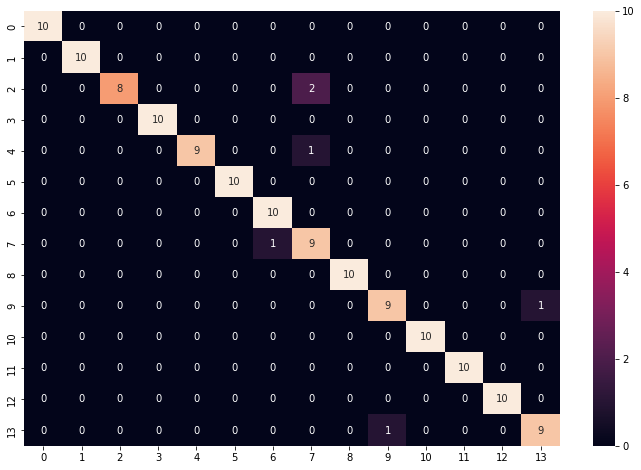

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,p_test,),annot=True)